In [1]:
# -*- coding: utf-8 -*-
"""

@author: profa
"""

#######################################################
##
##
##  Sentiment Analysis with NN/TF/Keras/Embedding
##
##  Gates
##
###########################################################

## Directions:
## 
## Install keras
## 1) Open a new command (or terminal) window. In Windows, this is 
##    called an Anaconda Prompt and you can access it my typing cmd 
##    into the windowns search area.
## 2) Then, into the Anaconda prompt type
##    conda install -c conda-forge keras
## 

## RUN all of the following imports to assure that you have all
## the libraries/packages that you need. 

################################################################


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding
import os
import matplotlib.pyplot as plt
import re
import shutil
import string
from tensorflow.keras import losses
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


print(tf.__version__)


2.12.0


In [5]:
MyPath="/Users/xingyuchen0810/Downloads/text_mining/project-port/"
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"

## Just download the data once
## After you download - find it on your computer and get the complete path
dataset = tf.keras.utils.get_file("SentimentData", url,
                                    untar=False,
                                    cache_dir=MyPath,
                                    extract=True, 
                                    archive_format='zip',
                                    cache_subdir="SD")


In [7]:
##############################################################
##
## Example 2 : Sentiment Analysis with LR, ANN, CNN, Embeddings
##
##  Topics: Getting data, encoding (CountV, One-hot), Embedding (trained and Glove)
##          Logistic Reg, ANNs, and CNN, with Sccuracy Vis
##
## From  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
## 
##
#########################################################################

DataPath2 = MyPath + str("SD/sentiment labelled sentences")
print(DataPath2)
os.listdir(DataPath2)


filepath_dict = {'yelp':  DataPath2+"/yelp_labelled.txt" ,
                 'amazon':  DataPath2+"/amazon_cells_labelled.txt",
                 'imdb':    DataPath2+"/imdb_labelled.txt"}

#print(filepath_dict["yelp"])
#yelp=filepath_dict["yelp"]
FILE=open(filepath_dict["yelp"])
for line in FILE:
    print(line)
FILE.close()

## https://realpython.com/python-keras-text-classification/

df_list = []
for source, filepath in filepath_dict.items():
    print("The source is\n", source)
    print("The filepath is\n", filepath)
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df)



/Users/xingyuchen0810/Downloads/text_mining/project-port/SD/sentiment labelled sentences
Wow... Loved this place.	1

Crust is not good.	0

Not tasty and the texture was just nasty.	0

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1

The selection on the menu was great and so were the prices.	1

Now I am getting angry and I want my damn pho.	0

Honeslty it didn't taste THAT fresh.)	0

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0

The fries were great too.	1

A great touch.	1

Service was very prompt.	1

Would not go back.	0

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!	1

I was disgusted because I was pretty sure that was human hair.	0

I was shocked because no signs indicate cash only.	0

Highly recommended.	1

Waitress was a little slow in service.	0

This pla

In [8]:

##################################################
##
## Create Training and Testing sets
##
#######################################################
#from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']
print(df_yelp)
sentences = df_yelp['sentence'].values
print(sentences)
y = df_yelp['label'].values
print(y)




                                              sentence  label source
0                             Wow... Loved this place.      1   yelp
1                                   Crust is not good.      0   yelp
2            Not tasty and the texture was just nasty.      0   yelp
3    Stopped by during the late May bank holiday of...      1   yelp
4    The selection on the menu was great and so wer...      1   yelp
..                                                 ...    ...    ...
995  I think food should have flavor and texture an...      0   yelp
996                           Appetite instantly gone.      0   yelp
997  Overall I was not impressed and would not go b...      0   yelp
998  The whole experience was underwhelming, and I ...      0   yelp
999  Then, as if I hadn't wasted enough of my life ...      0   yelp

[1000 rows x 3 columns]
['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Ric

In [9]:

######################################################
## Vectorize
##
###############################################################
#from sklearn.feature_extraction.text import CountVectorizer


# print(MyCV.vocabulary_)

print(len(sentences)) ## 1000 sentences - type list
MyVect_CV=CountVectorizer(input="content")
#, stop_words="english",max_features=400)

Vect_CV = MyVect_CV.fit_transform(sentences)
ColumnNames=MyVect_CV.get_feature_names()
CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNames)
print(CorpusDF_CV)

for nextcol in CorpusDF_CV.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):
        #print(nextcol)
         CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1)
#    ## The following will remove any column with name
#    ## of 3 or smaller - like "it" or "of" or "pre".
#    ##print(len(nextcol))  ## check it first
#    ## NOTE: You can also use this code to CONTROL
#    ## the words in the columns. For example - you can
#    ## have only words between lengths 5 and 9. 
#    ## In this case, we remove columns with words <= 3.
    elif(len(str(nextcol))<3):
        #print(nextcol)
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)
    elif(len(str(nextcol))>20):
        #print(nextcol)
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)
    # elif(nextcol in RemoveWords):
    #     print(nextcol)
    #     CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)

print(CorpusDF_CV)


## Put the label on for now so we can split the data up 
## without messing up the labels

CorpusDF_CV["label"]=y
print(CorpusDF_CV)


#####################

1000
     00  10  100  11  12  15  17  1979  20  2007  ...  yelpers  yet  you  \
0     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
1     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
2     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
3     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
4     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
..   ..  ..  ...  ..  ..  ..  ..   ...  ..   ...  ...      ...  ...  ...   
995   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
996   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
997   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
998   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
999   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   

     your  yourself  yucky  yukon  yum  yummy  zero  
0       0         0      0  

In [10]:

#####################
## Create Training and Testing Data
################################################

TrainDF, TestDF = train_test_split(CorpusDF_CV,test_size=0.20)
print(TestDF)
#                                                                    
#    random_state=1000)

######## Now - drop and save the labels for TrainDF and TestDF
TrainLabel=np.array(TrainDF["label"])
TrainDF=TrainDF.drop(["label"], axis=1)
print(TrainLabel)
print(TrainDF)

TestLabel=np.array(TestDF["label"])
TestDF=TestDF.drop(["label"], axis=1)
print(TestLabel)
print(TestDF)



     about  above  absolute  absolutely  absolutley  accident  accommodations  \
789      0      0         0           0           0         0               0   
533      0      0         0           0           0         0               0   
239      0      0         0           0           0         0               0   
735      0      0         0           0           0         0               0   
700      0      0         0           0           0         0               0   
..     ...    ...       ...         ...         ...       ...             ...   
817      0      0         0           0           0         0               0   
431      0      0         0           0           0         0               0   
384      0      0         0           0           0         0               0   
75       0      0         0           0           0         0               0   
637      0      0         0           0           0         0               0   

     accomodate  accordingl

In [11]:


##########################################
## Logistic Regression for Prediction
##
############################################

from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(TrainDF, TrainLabel)
score = LR_classifier.score(TestDF, TestLabel)

print("Accuracy:", score)

Accuracy: 0.86


<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(800, 1969)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(200, 1969)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1969
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                19700     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 19,711
Trainable params: 19,711
Non-trainable params: 0
_________________________________________________________________
<class 

2023-04-08 22:09:45.034592: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Training Accuracy: 1.0000
Testing Accuracy:  0.8100
Generate a prediction
7/7 [==============================] - 0s 926us/step
prediction shape: (200, 1)
[[79 19]
 [19 83]]
{'loss': [0.684590756893158, 0.6290844082832336, 0.5389120578765869, 0.43515029549598694, 0.3459596633911133, 0.2761717140674591, 0.221954345703125, 0.181306853890419, 0.14956144988536835, 0.1253482699394226, 0.10615802556276321, 0.09041614830493927, 0.07778217643499374, 0.06764443218708038, 0.05950925499200821, 0.05238695442676544, 0.04676926136016846, 0.04187089577317238, 0.03765455633401871, 0.033767614513635635, 0.030914688482880592, 0.02823651395738125, 0.025590453296899796, 0.023460958153009415, 0.02165629342198372, 0.020033016800880432, 0.01856915093958378, 0.017262320965528488, 0.016089610755443573, 0.015021426603198051, 0.0139557383954525, 0.012998011894524097, 0.012342089787125587, 0.011511307209730148, 0.010801736265420914, 0.010204697027802467, 0.009669216349720955, 0.00906845647841692, 0.008574994280934

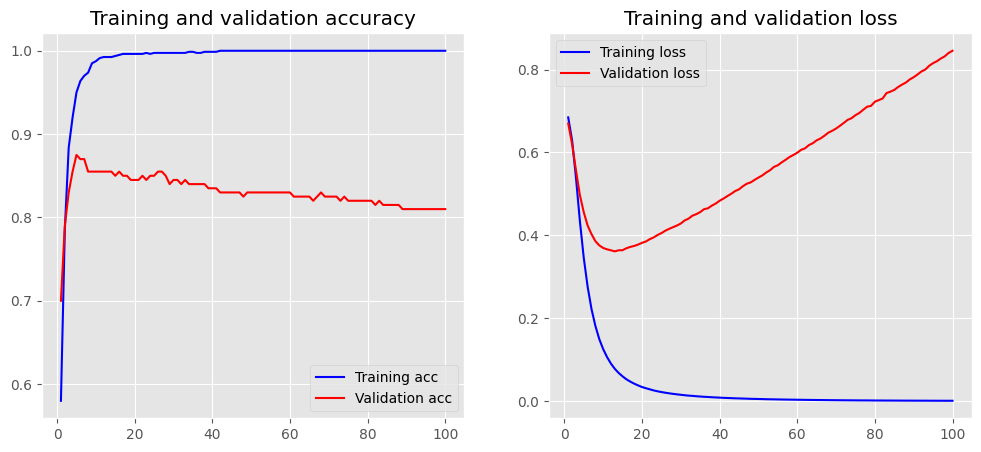

In [12]:
##########################################
##  TF/Keras NN
##
##############################################

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

print(type(TrainDF))
TrainDF_A = np.array(TrainDF)
print(TrainDF_A)
print(TrainDF_A.shape)
print(type(TrainDF_A))
print(type(TrainLabel))

print(type(TestDF))
TestDF_A = np.array(TestDF)
print(TestDF_A)
print(TestDF_A.shape)
print(type(TestDF_A))
print(type(TestLabel))

input_dim = TrainDF.shape[1]  # Number of features
print(input_dim)

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
model.summary()

print(type(TrainLabel))

history = model.fit(TrainDF_A, TrainLabel,
                     epochs=100,
                     verbose=False,
                     validation_data=(TestDF_A, TestLabel),
                     batch_size=10)

#from tensorflow.keras.backend import clear_session
#clear_session()



loss, accuracy = model.evaluate(TrainDF_A, TrainLabel, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestDF_A, TestLabel, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))



# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(TestDF_A)
#print(prediction)
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
#print(prediction)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction, TestLabel))


import matplotlib.pyplot as plt
plt.style.use('ggplot')

print(history.history)
print(history.history["accuracy"])

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    

plot_history(history)

#for i in range(0, 199):
#    if(prediction[i][0].astype(np.int32) != TestLabel[i].astype(np.int32)):
#        print(i)
        # print(prediction[i][0])
        # print(TestLabel[i])
        # print(TestDF_A[i])
        # print(TestDF.iloc[i])
        

In [13]:
####################################################
##
## Word Embedding
##
#################################################################
## One way to represent a word as a vector (rather than a count such as above)
## is to use "encoding" - such as one-hot-encoding.
## In this case, we would first need the length of the vocabulary. 
## Next, each vector is the vocab length where all values are 0
## except for the one value (which is a 1) for that word.

##
##
##  Here is a small example of one-hot encoding
##
##
##-----------------------------------------------
## Example 1: Basic encoding with numbers
##------------------------------------------------
Words=["My", "dog", "will", "hike", "the", "hike", "with", "my", "dog", "is", "fun", 
       "the", "hike", "is", "long"]
print(Words)
print(type(Words))

#from sklearn.preprocessing import LabelEncoder

MyEncoder = LabelEncoder() #instantiate
WordLabels_0_1= MyEncoder.fit_transform(Words)
print(WordLabels_0_1)
print(type(WordLabels_0_1))

##------------------------------------------------
## Example 2 - One-hot Encoding
#from sklearn.preprocessing import OneHotEncoder
## Note that Example 2 uses the output from Example 1 above
##---------------------------------------------------------
SentenceLength=len(WordLabels_0_1)
My_1_Hot_encoder = OneHotEncoder(sparse=False)
WordLabelsOneHot = WordLabels_0_1.reshape((SentenceLength, 1))
WordEncode=My_1_Hot_encoder.fit_transform(WordLabelsOneHot)
print(WordEncode)



['My', 'dog', 'will', 'hike', 'the', 'hike', 'with', 'my', 'dog', 'is', 'fun', 'the', 'hike', 'is', 'long']
<class 'list'>
[0 1 8 3 7 3 9 6 1 4 2 7 3 4 5]
<class 'numpy.ndarray'>
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:

##--------------------------------------------------------
## Example 3 - Embedding
##
## Embeddings represent words as dense word vector
## So a vector for each word where the vector is not 0 and 1
## but rather uses values that better describe the "meaning"
## of the word. 
##
## Word Embedding Goa: map semantic meaning into a geometric space. 
## This geometric space is then called the embedding space.
##
## How to create word embeddings
##  One way is to train your word embeddings during the training 
## #of your neural network. The other way is by using pretrained 
## word embeddings which you can directly use in your model.
##--------------------------------------------------------
## Now you need to tokenize the data into a format that can be used 
## by the word embeddings. Keras offers a couple of cmethods for text 
## preprocessing and sequence preprocessing 
## You can start by using the Tokenizer utility class
##  which can vectorize a text corpus into a list of integers. 
## Each integer maps to a value in a dictionary that encodes 
## the entire corpus, with the keys in the dictionary being 
## the vocabulary terms themselves. You can add the parameter num_words, 
## which is responsible for setting the size of the vocabulary. 
##
############################################################
##
## 
#from tensorflow.keras.preprocessing.text import Tokenizer






## Here we need a LIST of the documents - in this case a list
## of the sentences
print(sentences) ## data as sentences
print(y)  ## labels of each sentence
## Check lengths
print(len(y))
print(len(sentences))
#print(type(sentences))
#
MyTokenizer = Tokenizer(num_words=5000)
MyTokenizer.fit_on_texts(sentences)

AllData= MyTokenizer.texts_to_sequences(sentences)
vocab_size = len(MyTokenizer.word_index) + 1  
print(vocab_size)

## Let's see some sentences and numeric embedding
for i in range(0,20):
    print(sentences[i])
    print(AllData[i])
    

#The indexing is ordered by most common words 
# in the text. FOr example, "the" is "1".

for word in ['the', 'all', 'happy', 'sad']:
    print(word, ":", MyTokenizer.word_index[word])


## Notice: scikit-learn’s CountVectorizer creates vectors of word COUNTS
## without order.
## The Tokenizer() keeps order an replaces each word with a number.


['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!' 

In [15]:

#################################
## Padding each sentence vector
###############################################
## Right now, each sentence vector is a different
## length. This does not work well with NNs
##
## We can PAD each - so that all have the same
## length.
##################################################
#from keras.preprocessing.sequence import pad_sequences
# maxlen parameter - specify how long the sequences should be. 
maxlen = 100

AllData = pad_sequences(AllData, padding='post', maxlen=maxlen)
print(AllData[0, :]) ## Row 0 and all columns
print(AllData)
print(type(y))
print(y[0])


#######################################################
##
## Right now, we have our sentences - our data
## embedded as sequential and numeric - with padding.
## However - 
## We do not yet have a Training and Testing set
##
## Let's create these....
##
##############################################################
print(type(AllData)) ## numpy array
print(AllData.shape) ## 1000 by 100
print(AllData)
print(AllData[1])


MySample=np.random.choice(1000, size=200, replace=False, p=None)
print(MySample)

TestingData=[]
TrainingData=[]
TrainingLabels=[]
TestingLabels=[]

for i in range(0,1000):
    #print(i)
    if i in MySample:
        TestingData.append(AllData[i])
        TestingLabels.append(y[i])
    else:
        TrainingData.append(AllData[i])
        TrainingLabels.append(y[i])
        
    
TestingData=np.array(TestingData)
print(TestingData)
print(len(TestingData))
print(TestingLabels)
print(len(TestingLabels))

TrainingData=np.array(TrainingData)
print(TrainingData)
print(len(TrainingData))
print(TrainingLabels)
print(len(TrainingLabels))


[428 165   8  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[[428 165   8 ...   0   0   0]
 [586   7  12 ...   0   0   0]
 [ 12 151   2 ...   0   0   0]
 ...
 [207   3   4 ...   0   0   0]
 [  1 833  81 ...   0   0   0]
 [200  44  49 ...   0   0   0]]
<class 'numpy.ndarray'>
1
<class 'numpy.ndarray'>
(1000, 100)
[[428 165   8 ...   0   0   0]
 [586   7  12 ...   0   0   0]
 [ 12 151   2 ...   0   0   0]
 ...
 [207   3   4 ...   0   0   0]
 [  1 833  81 ...   0   0   0]
 [200  44  49 ...   0   0   0]]
[586   7  12  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           103600    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 104,121
Trainable params: 104,121
Non-trainable params: 0
_________________________________________________________________
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'nump

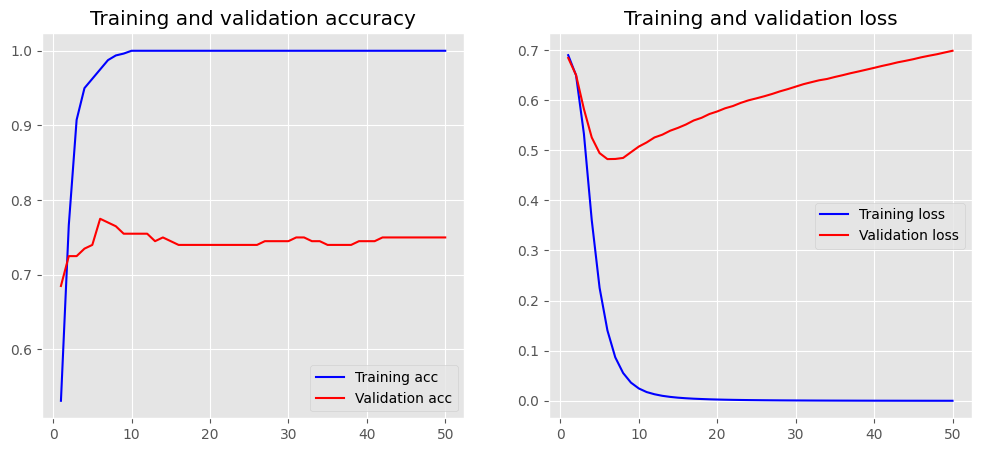

In [16]:

#########################################################
##
## Now we can use Keras to create BETTER embeddings
## while also training our NN model.
##
########################################################
#from tensorflow.keras.models import Sequential
#from tensorflow.keras import layers


embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


print(type(TrainingData))
print(type(TrainingLabels))
## !! The labels need to be an array!
TrainingLabels=np.array(TrainingLabels)
print(type(TrainingLabels))

print(type(TestingData))
print(type(TestingLabels))
TestingLabels=np.array(TestingLabels)
print(type(TestingLabels))


history = model.fit(TrainingData, TrainingLabels,
                    epochs=50,
                    verbose=True,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)

loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)


In [ ]:

########################################################
##
## Using other word embedding options
##
## Word2Vec or Glove
##
################################################################
## RE:
    # An alternative is to use a precomputed embedding 
    # space that utilizes a much larger corpus.
    # It is possible to precompute word embeddings by 
    # simply training them on a large corpus of text. 
    # Among the most popular methods are Word2Vec 
    # developed by Google and GloVe (Global Vectors for Word 
    # Representation) developed by the Stanford NLP Group.

##############################################################
## Word2Vec Paper
## https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf
## Uses  neural networks
## Pretrained embeddings: https://code.google.com/archive/p/word2vec/
##
## Glove 
## https://nlp.stanford.edu/projects/glove/
## Uses co-occurrence matrix and matrix factorization
## Glove Pretrained: GLove6B.zip here: https://nlp.stanford.edu/projects/glove/
##
## Self-training via Gemsim here
## https://radimrehurek.com/gensim/models/word2vec.html
#####################################################################
##
##
## Using GLove and https://nlp.stanford.edu/projects/glove/  (Glove6B.zip)
## Step 1: Go to the link and download Glove6B.zip to your computer
##
## Step 2: Unzip and place the 4 Glove txt files into a folder
## My folder is here: C:\Users\profa\Desktop\UCB\Text Mining\DATA\GLOVE
## The 4 files are: glove.6B.50d.txt, glove6B.100d.txt, glove.6B.200d.txt. 
## and glove.6B.300d.txt
#########################################################################

# ## Let's have a look at the 50d where each word is represented by a vector with 50
# ## values. 
# import sys
# import csv
# ## Maximize limit as this is a large file
# csv.field_size_limit(sys.maxsize)

GlovePath="C:/Users/profa/Desktop/UCB/Text Mining/DATA/GLOVE/glove.6B.50d.txt"

#import numpy as np
print(MyTokenizer.word_index)


def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    #print(embedding_matrix.shape)

    with open(filepath, encoding='UTF-8') as f: ## You MUST specify the encoding!
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                #print(word)
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

## Check on the results ..............................................
embedding_dim = 50 ## Because we are using glove.6B.50d.txt
embedding_matrix = create_embedding_matrix(GlovePath, MyTokenizer.word_index, embedding_dim)
print(type(embedding_matrix))
print(embedding_matrix[0])
TheWord=list(filter(lambda x: MyTokenizer.word_index[x] == 1, MyTokenizer.word_index))[0]
print(TheWord)
print("Word: ",TheWord, "\nEmbedding: ", embedding_matrix[1])

TheWord=list(filter(lambda x: MyTokenizer.word_index[x] == 25, MyTokenizer.word_index))[0]
print("Word: ",TheWord, "\nEmbedding: ", embedding_matrix[25])

#............................................................................

###################################################
## how many of the embedding vectors are nonzero
############################################
nonzero_Emb_Vectors = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_Emb_Vectors / vocab_size   ## We have captured > 95% of our words



###################################################
##
##  Using the NN with Glove Embeddings
##
##########################################################
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], ## Our Glove Embeddings
                           input_length=maxlen, 
                           trainable=False))  ## You can put True here as well to train the 
                                              ## embeddings.  
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(TrainingData, TrainingLabels,
                    epochs=50,
                    verbose=False,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)
loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

######################################################
##
##  Using a CNN for this same prediction
##
##  Convolutional NNs for sentiment analysis
##
##
######################################################
## A CNN has hidden layers which are called convolutional layers. 
# When you think of images, a computer has to deal with 
# a two dimensional matrix of numbers and therefore you need 
# some way to detect features in this matrix. 
# These convolutional layers are able to detect edges, 
# corners and other kinds of textures which makes them such a 
# special tool. The convolutional layer consists of 
# multiple filters which are slid across the image and 
# are able to detect specific features.
#https://realpython.com/python-keras-text-classification/
#When you are working with sequential data, like text, you work 
#with one dimensional convolutions, but the idea and the application 
#stays the same. You still want to pick up on patterns in the sequence 
#which become more complex with each added convolutional layer.
#######################################################################
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(TrainingData, TrainingLabels,
                    epochs=10,
                    verbose=True,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)
loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)
